# Preliminaries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples

from sklearn.metrics import silhouette_samples, silhouette_score



Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Reproducibility

In [2]:
#First let's set a random seed for reproducibility.
np.random.seed(47)

# Reading the Data

In [3]:
#Read the dataset
df = pd.read_csv('wdbc.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  ...  \
0          0.11840           0.27760          0.3001             0.14710  ...   
1          0.08474           0.07864          0.0869             0.07017  ...   
2          0.10960           0.15990          0.1974             0.12790  ...   
3          0.14250           0.28390          0.2414             0.10520  ...   
4          0.10030           0.13280          0.1980             0.10430  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concavepoints_worst  symmetry_worst  \
0             0.6656           0.7119               0.2654          0.4601   
1             0.1866           0.2416               0.1860          0.2750   
2             0.4245           0.4504               0.2430          0.3613   
3             0.8663           0.6869               0.2575          0.6638   
4             0.2050           0.4000               0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 32 columns]

# Some Basic Data Cleaning
Are there any na's in the data? Let's count how many null values there are in each column (ie. axis=0) below.

In [4]:
df.isnull().sum(axis = 0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concavepoints_worst        0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Looks like there are no nas. We should probably doublecheck with the original data source to determine if this is indeed the raw data or if this data has been preprocessed in someway (have NAs already been dropped, imputed etc?)


# Basic Descriptive Analytics - Single Numerical Variable

In [5]:
#Summary statistics for each attribute
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
count       569.000000        569.000000      569.000000          569.000000   
mean          0.096360          0.104341        0.088799            0.048919   
std           0.014064          0.052813        0.079720            0.038803   
min           0.052630          0.019380        0.000000            0.000000   
25%           0.086370          0.064920        0.029560            0.020310   
50%           0.095870          0.092630        0.061540            0.033500   
75%           0.105300          0.130400        0.130700            0.074000   
max           0.163400          0.345400        0.426800            0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concavepoints_worst  symmetry_worst  fractal_dimension_worst  
count           569.000000      569.000000               569.000000  
mean              0.114606        0.290076                 0.083946  
std               0.065732        0.061867                 0.018061  
min               0.000000        0.156500                 0.055040  
25%               0.064930        0.250400                 0.071460  
50%               0.099930        0.282200                 0.080040  
75%               0.161400        0.317900                 0.092080  
max               0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# More pre-processing?
We will use k-means algorithm to cluster this dataset. 
* Question 1: Will some of these attributes described above have a greater influence on the final results?




* Question 2: If so, which ones?




* Question 3: Why?




* Question 4: What could we do 'equalize' the influence of each of the attributes?



* Question 5: Why should we be careful about doing this pre-processing in an analysis?




# Basic Descriptive Analytics - Relationship between Two Numerical Variables (Controlling for Tumor Type)

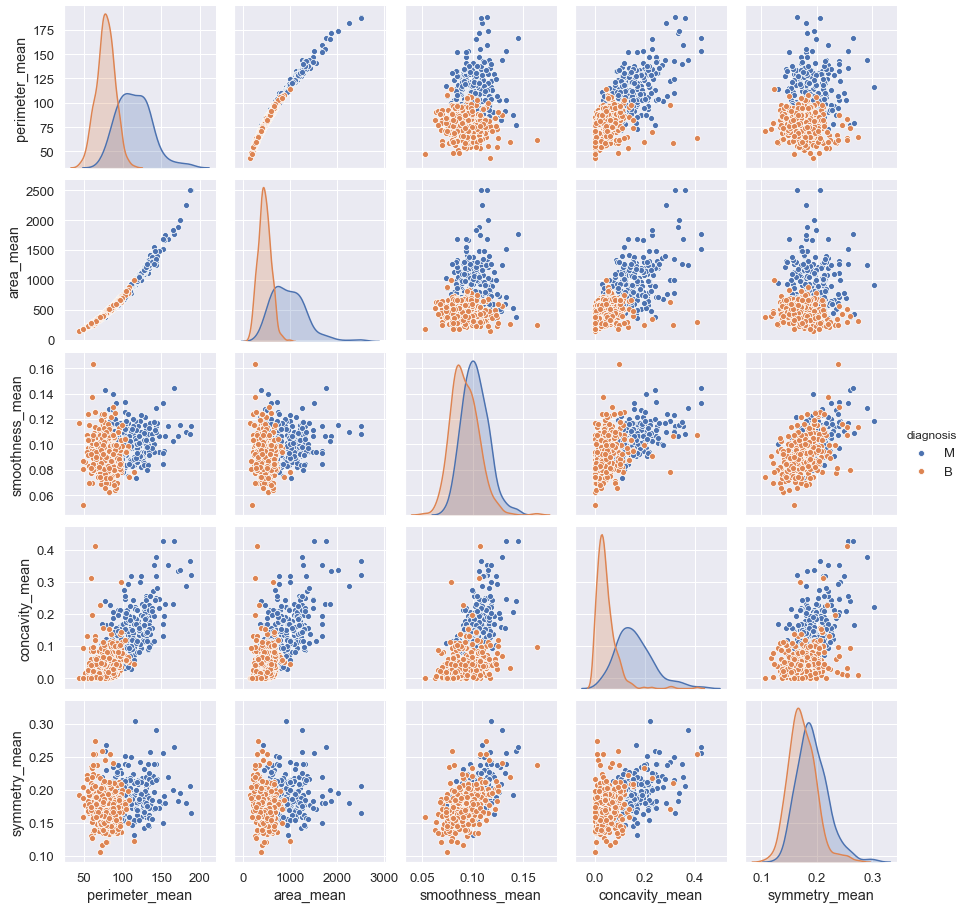

In [7]:
# Visualize the relationships between some of the attributes.
sns.set()

with sns.plotting_context("notebook", font_scale=1.2):
    sns.pairplot(df,
                 vars=['perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean'],
                 hue="diagnosis")

plt.show()

## Interpreting

Question 1: What does the smoothness_mean vs. perimeter_mean plot tell us about the relationship between the tumor-type threshold and these two variables?

Question 2: What does the perimeter_mean vs. concavity_mean plot tell us about the relationship between the tumor-type threshold and these two variables?

# Set just the data we want to cluster

In [8]:
X=df.drop(['id','diagnosis'],axis=1)
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concavepoints_mean  symmetry_mean  \
0           0.27760          0.3001             0.14710         0.2419   
1           0.07864          0.0869             0.07017         0.1812   
2           0.15990          0.1974             0.12790         0.2069   
3           0.28390          0.2414             0.10520         0.2597   
4           0.13280          0.1980             0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concavepoints_worst  symmetry_worst  fractal_dimension_worst  
0               0.2654          0.4601                  0.11890  
1               0.1860          0.2750                  0.08902  
2               0.2430          0.3613                  0.08758  
3               0.2575          0.6638                  0.17300  
4               0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

# Is this dataset clusterable?

* WRITE ANSWER HERE





In [9]:
from pyclustertend import hopkins

In [10]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.04748771229822642, 0.06903235491291615, 0.04477691737950029, 0.03927944191319148, 0.03495109544185611]


# Elbow Plot to Determine Number of Clusters

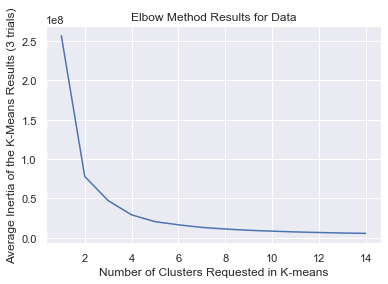

In [11]:
cluster_num_list=range(1,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()

# Silhouette Plots to Also Determine Number of Clusters

For n_clusters = 2 The average silhouette_score is : 0.6972646156059465
For n_clusters = 3 The average silhouette_score is : 0.6660201620263426
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.5120588504057626
For n_clusters = 6 The average silhouette_score is : 0.48348245778609444
For n_clusters = 7 The average silhouette_score is : 0.4678731706304421
For n_clusters = 8 The average silhouette_score is : 0.46774839853503786
For n_clusters = 9 The average silhouette_score is : 0.47189046670908413
For n_clusters = 10 The average silhouette_score is : 0.46583347605105324
For n_clusters = 11 The average silhouette_score is : 0.44707277534206197
For n_clusters = 12 The average silhouette_score is : 0.44766706571299697
For n_clusters = 13 The average silhouette_score is : 0.4220401806021348
For n_clusters = 14 The average silhouette_score is : 0.4186240185407429


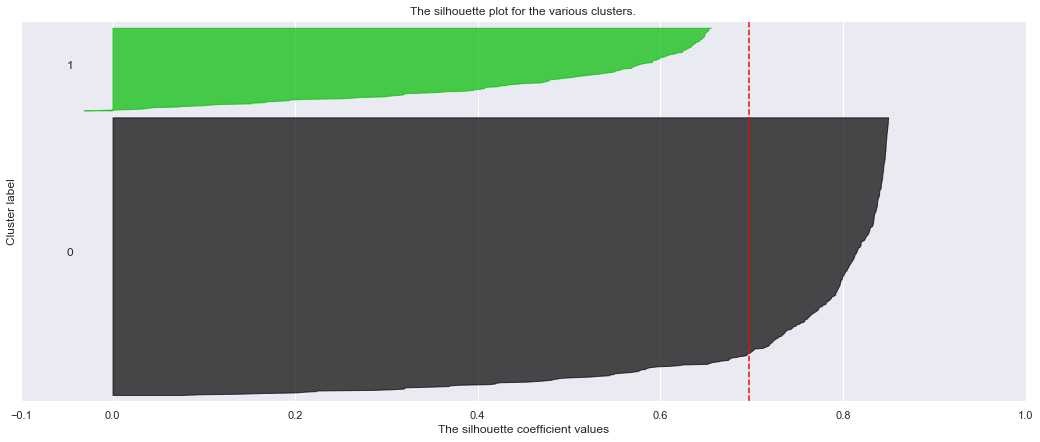

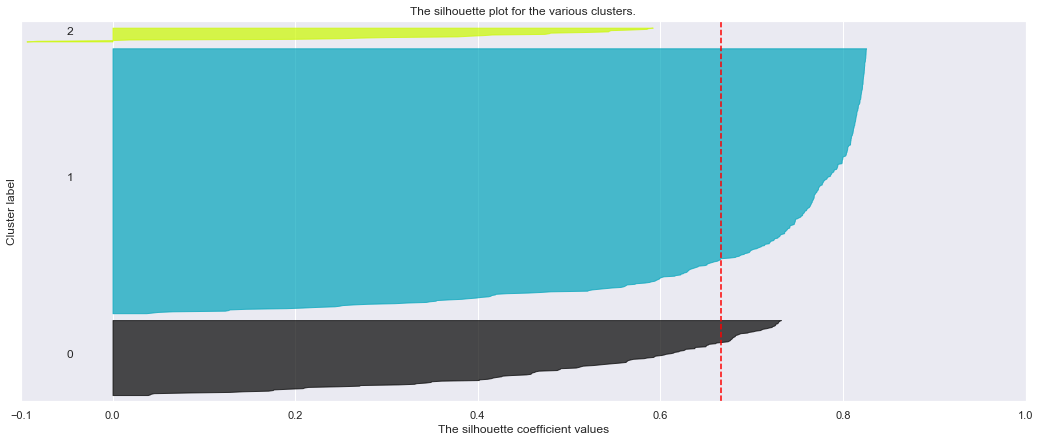

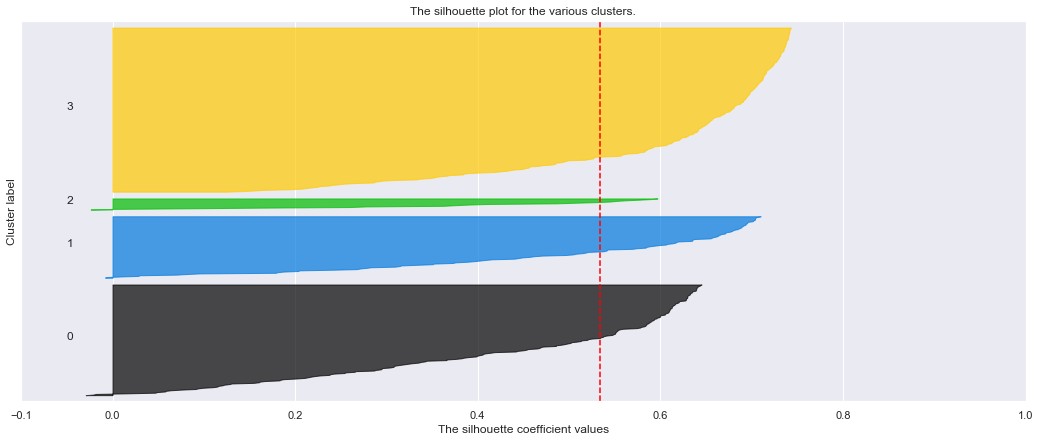

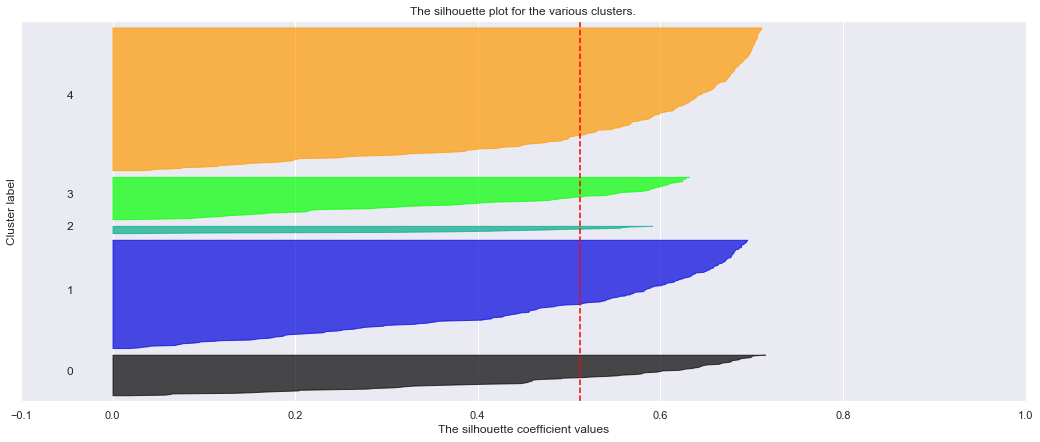

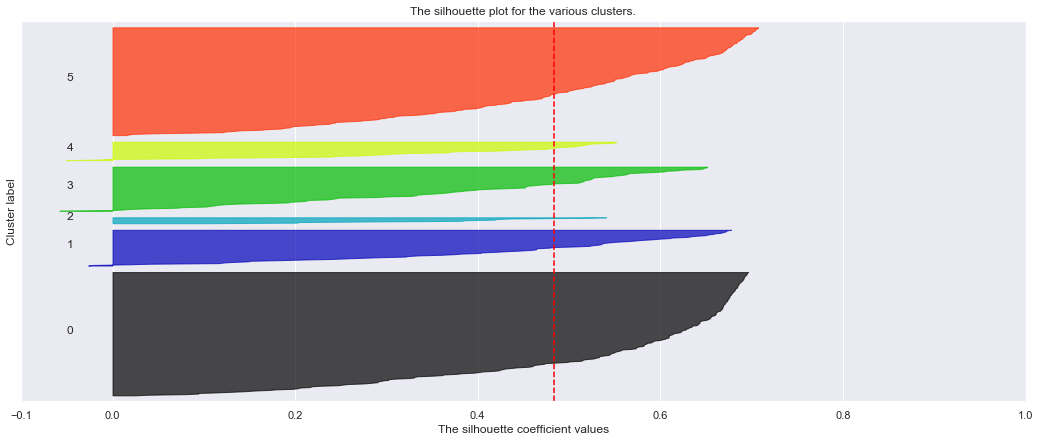

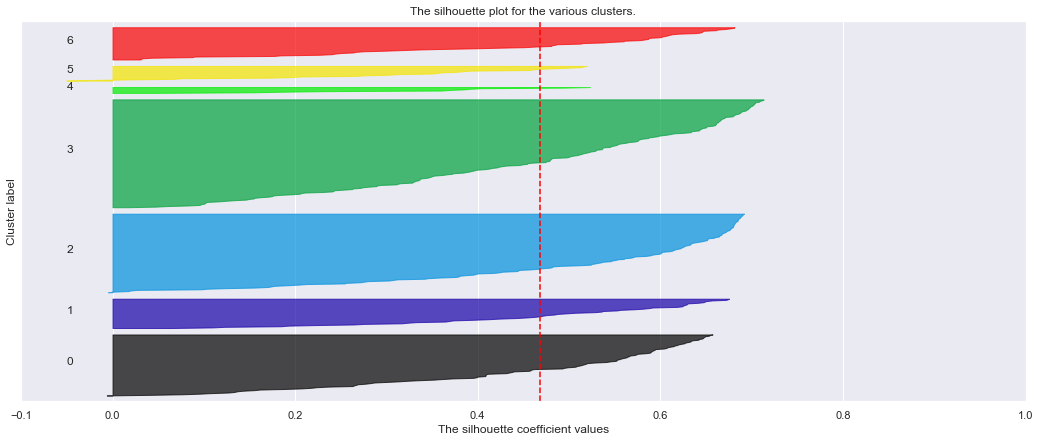

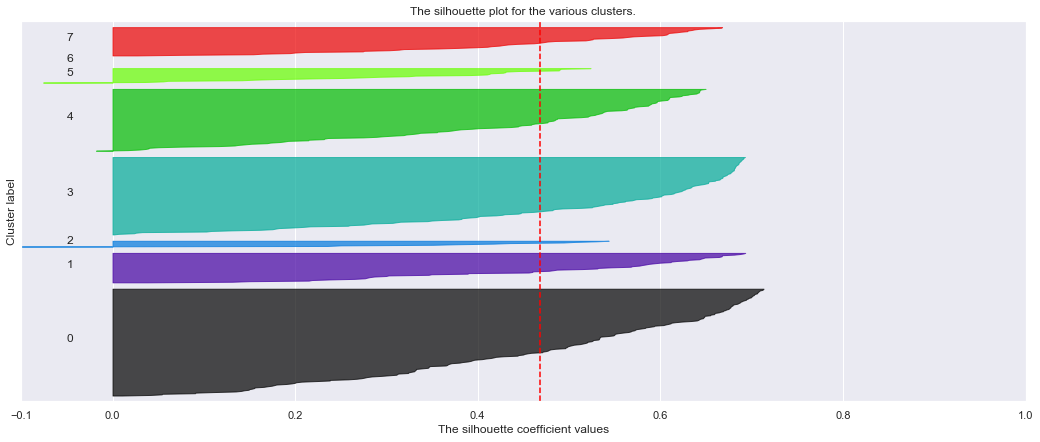

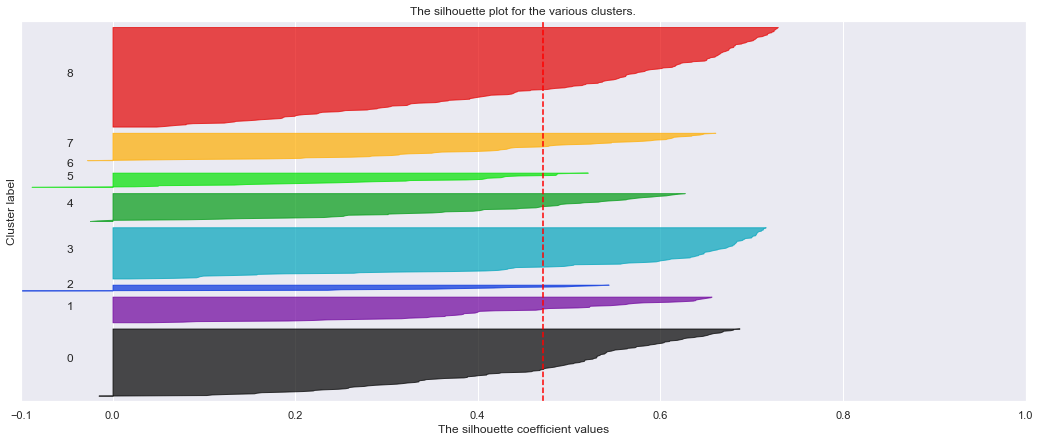

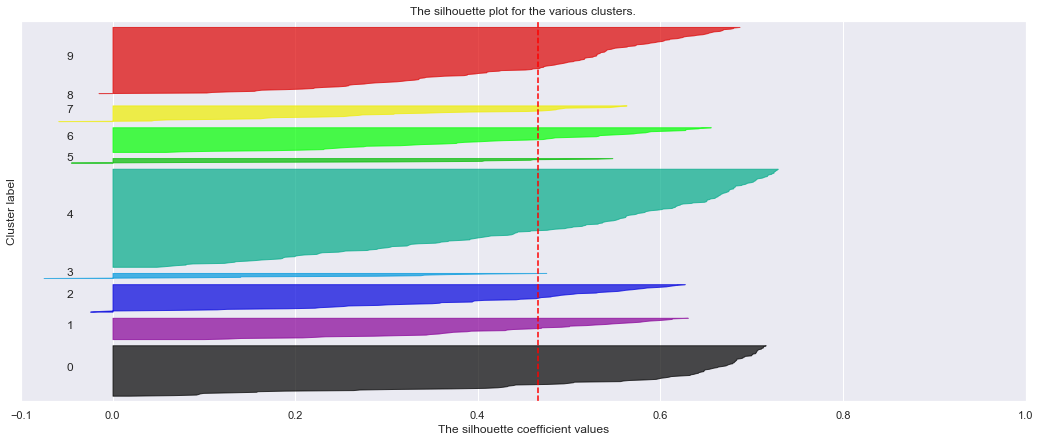

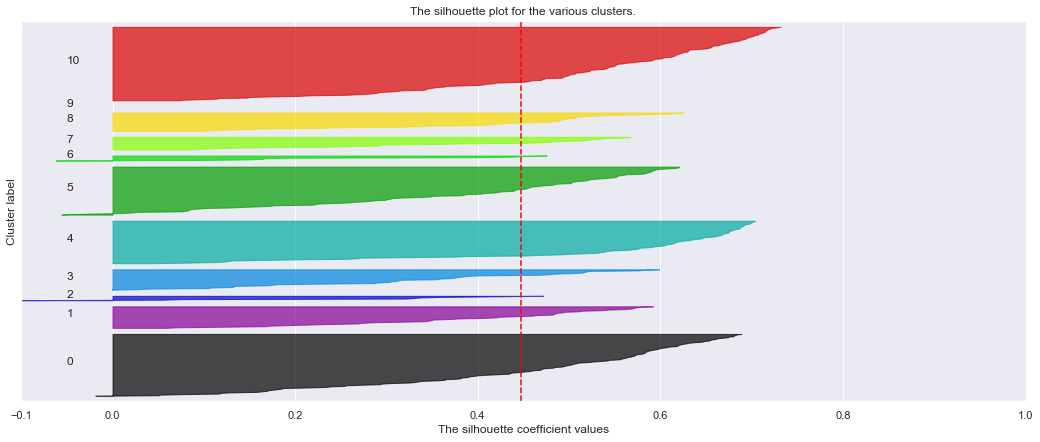

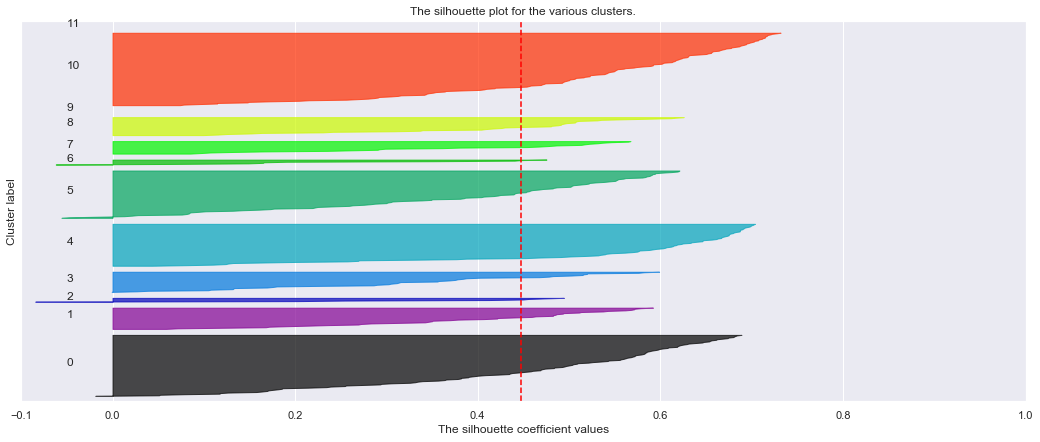

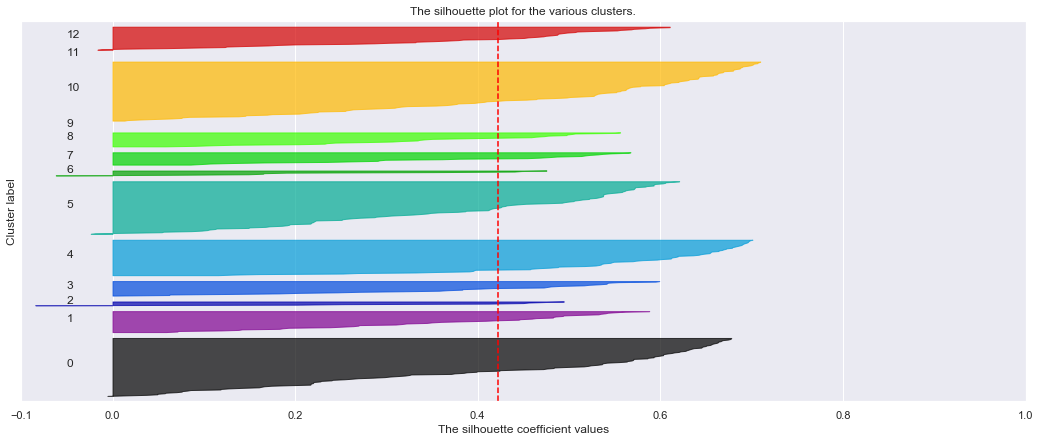

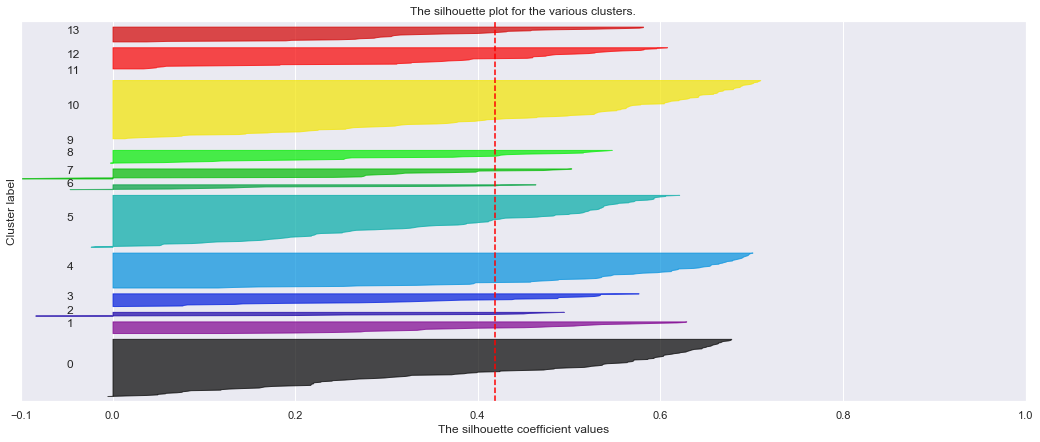

In [17]:
cluster_num_list=range(2,15)
silhouette_avg_list=[]

for n_clusters in cluster_num_list:
    
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #CLUSTER THE DATA
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = kmeans.labels_
    
    #FINDS THE AVERAGE SILHOUETTE SCORE
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

### Do benign or malignant tumors have more cohesion and separation with their assigned clusters?

In [19]:
#Silhouette values for each object
df['silhouette_values']=sample_silhouette_values

df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
0            0.11840           0.27760         0.30010             0.14710   
1            0.08474           0.07864         0.08690             0.07017   
2            0.10960           0.15990         0.19740             0.12790   
3            0.14250           0.28390         0.24140             0.10520   
4            0.10030           0.13280         0.19800             0.10430   
..               ...               ...             ...                 ...   
564          0.11100           0.11590         0.24390             0.13890   
565          0.09780           0.10340         0.14400             0.09791   
566          0.08455           0.10230         0.09251             0.05302   
567          0.11780           0.27700         0.35140             0.15200   
568          0.05263           0.04362         0.00000             0.00000   

     ...  perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0    ...           184.60      2019.0           0.16220            0.66560   
1    ...           158.80      1956.0           0.12380            0.18660   
2    ...           152.50      1709.0           0.14440            0.42450   
3    ...            98.87       567.7           0.20980            0.86630   
4    ...           152.20      1575.0           0.13740            0.20500   
..   ...              ...         ...               ...                ...   
564  ...           166.10      2027.0           0.14100            0.21130   
565  ...           155.00      1731.0           0.11660            0.19220   
566  ...           126.70      1124.0           0.11390            0.30940   
567  ...           184.60      1821.0           0.16500            0.86810   
568  ...            59.16       268.6           0.08996            0.06444   

     concavity_worst  concavepoints_worst  symmetry_worst  \
0             0.7119               0.2654          0.4601   
1             0.2416               0.1860          0.2750   
2             0.4504               0.2430          0.3613   
3             0.6869               0.2575          0.6638   
4             0.4000               0.1625          0.2364   
..               ...                  ...             ...   
564           0.4107               0.2216          0.2060   
565           0.3215               0.1628          0.2572   
566           0.3403               0.1418          0.2218   
567           0.9387               0.2650          0.4087   
568           0.0000               0.0000          0.2871   

     fractal_dimension_worst  predicted_cluster  silhouette_values  
0                    0.11890                  0           0.289991  
1                    0.08902                  0           0.315437  
2                    0.08758                  0           0.468607  
3                    0.17300                  1           0.278608  
4                    0.07678                  0           0.275938  
..               

In [23]:
#Do benign or malignant tumors have more 
df.groupby(['diagnosis']).mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concavepoints_mean  symmetry_mean  ...  perimeter_worst  \
diagnosis                                     ...                    
B                    0.025717       0.174186  ...        87.005938   
M                    0.087990       0.192909  ...       141.370330   

            area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                      
B           558.899440          0.124959           0.182673         0.166238   
M          1422.286321          0.144845           0.374824         0.450606   

           concavepoints_worst  symmetry_worst  fractal_dimension_worst  \
diagnosis                                                                 
B                     0.074444        0.270246                 0.079442   
M                     0.182237        0.323468                 0.091530   

           predicted_cluster  silhouette_values  
diagnosis                                        
B                   0.997199           0.456071  
M                   0.386792           0.355565  

[2 rows x 33 columns]

### What do the silhouette scores and plots tell us?

# We can also use a Silhouette plot to determine the number of clusters.

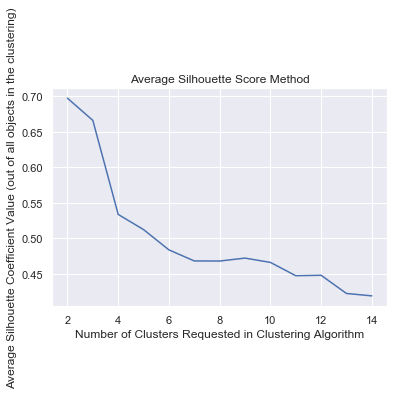

In [13]:
#Plot it    
plt.plot(cluster_num_list,silhouette_avg_list)
plt.xlabel('Number of Clusters Requested in Clustering Algorithm')
plt.ylabel('Average Silhouette Coefficient Value (out of all objects in the clustering)')
plt.title('Average Silhouette Score Method')
plt.show()

### What does the plot tell us about the number of clusters we should use?

# How Close is Our Clustering to the Actual Cluster Labels?

In [14]:
kmeans=KMeans(n_clusters=2).fit(X)
df['predicted_cluster']=kmeans.labels_

In [15]:
adjusted_rand_score(df['predicted_cluster'], df['diagnosis'])

0.49142453622455523